In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
num_training = X.shape[0]
num_features = X.shape[1]

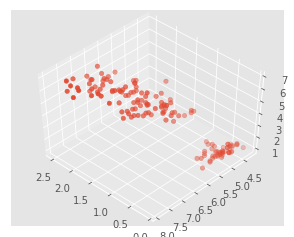

In [5]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2]);

In [14]:
class SoftMaxClassifier:
    
    def __init__(self, n_iter=100, lr=1e-3, reg=1e-5, verbose=True):
        self.n_iter = n_iter
        self.lr = lr
        self.reg = reg
        self.verbose = verbose
    
    def __slow_softmax(self, X, y):
        loss = 0.0
        dW = np.zeros_like(self.W)
        num_classes = self.W.shape[1]
        num_train = X.shape[0]
        scores = np.dot(X, self.W)

        # Calculate loss and gradient for each element of our batch.
        for ii in range(num_train):
            current_scores = scores[ii, :]
            # Fix for numerical stability by subtracting max from score vector.
            shift_scores = current_scores - np.max(current_scores)
            # Calculate loss for this example.
            loss_ii = -shift_scores[y[ii]] + np.log(np.sum(np.exp(shift_scores)))
            loss += loss_ii
            for jj in range(num_classes):
                softmax_score = np.exp(shift_scores[jj]) / np.sum(np.exp(shift_scores))
              # Gradient calculation.
                if jj == y[ii]:
                    dW[:, jj] += (-1 + softmax_score) * X[ii]
                else:
                    dW[:, jj] += softmax_score * X[ii]

          # Average over the batch and add our regularization term.
        loss /= num_train
        loss += self.reg * np.sum(self.W*self.W)
        # Average over the batch and add derivative of regularization term.
        dW /= num_train
        dW += 2*self.reg*self.W  
        return loss, dW
        
    def __fast_softmax(self, X, y):
      # Initialize the loss and gradient to zero.
        loss = 0.0
        dW = np.zeros_like(self.W)
        num_train = X.shape[0]
        scores = np.dot(X, self.W)
        shift_scores = scores - np.max(scores, axis=1)[...,np.newaxis]
        softmax_scores = np.exp(shift_scores)/ np.sum(np.exp(shift_scores), axis=1)[..., np.newaxis]
        dScore = softmax_scores
        dScore[range(num_train),y] = dScore[range(num_train),y] - 1
        dW = np.dot(X.T, dScore)
        dW /= num_train
        dW += 2*self.reg*self.W
        correct_class_scores = np.choose(y, shift_scores.T)  # Size N vector
        loss = -correct_class_scores + np.log(np.sum(np.exp(shift_scores), axis=1))
        loss = np.sum(loss)
        loss /= num_train
        loss += self.reg * np.sum(self.W*self.W)
        return loss, dW    
    
    def fit(self, X, y):
        num_classes = np.max(y) + 1 
        self.W = np.random.rand(X.shape[1], num_classes)* 0.0001
        num_training = X.shape[0]
        num_train = X.shape[0]
        X_indices = np.arange(num_train)
        loss = 0.0
        for i in range(self.n_iter):
            loss, dW = self.__fast_softmax(X, y)
            self.W -= self.lr * dW
            if self.verbose and i % 100 == 0:
                print('iteration %d / %d: loss %f' % (i, self.n_iter, loss))
                
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        pred_scores = np.dot(X, self.W)
        y_pred = np.argmax(pred_scores, axis=1)
        return y_pred
        
            

In [15]:
mask = np.random.choice(num_training, num_training)
X_train, X_test = X[mask][33:],X[mask][:33]
y_train, y_test = y[mask][33:],y[mask][:33]

In [16]:
def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

In [20]:
model = SoftMaxClassifier(n_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Softmax Accuracy:", accuracy)

iteration 0 / 10000: loss 1.098592
iteration 100 / 10000: loss 1.014065
iteration 200 / 10000: loss 0.971395
iteration 300 / 10000: loss 0.933854
iteration 400 / 10000: loss 0.899987
iteration 500 / 10000: loss 0.869409
iteration 600 / 10000: loss 0.841781
iteration 700 / 10000: loss 0.816786
iteration 800 / 10000: loss 0.794126
iteration 900 / 10000: loss 0.773533
iteration 1000 / 10000: loss 0.754766
iteration 1100 / 10000: loss 0.737612
iteration 1200 / 10000: loss 0.721883
iteration 1300 / 10000: loss 0.707415
iteration 1400 / 10000: loss 0.694065
iteration 1500 / 10000: loss 0.681707
iteration 1600 / 10000: loss 0.670233
iteration 1700 / 10000: loss 0.659547
iteration 1800 / 10000: loss 0.649567
iteration 1900 / 10000: loss 0.640221
iteration 2000 / 10000: loss 0.631443
iteration 2100 / 10000: loss 0.623180
iteration 2200 / 10000: loss 0.615382
iteration 2300 / 10000: loss 0.608005
iteration 2400 / 10000: loss 0.601012
iteration 2500 / 10000: loss 0.594368
iteration 2600 / 10000: 

In [18]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Sklearn Accuracy:", accuracy)

Sklearn Accuracy: 1.0
